In [1]:
import os
# os.chdir('../')
os.getcwd()

'/home/gianni/Files/Studium/Master/04_FS2023/MT/f1tenth_development_gym/plots'

In [2]:
import pandas as pd
from scipy.fft import fft
import scipy
import matplotlib.pyplot as plt
from scipy import signal

# Load data

2500
2500


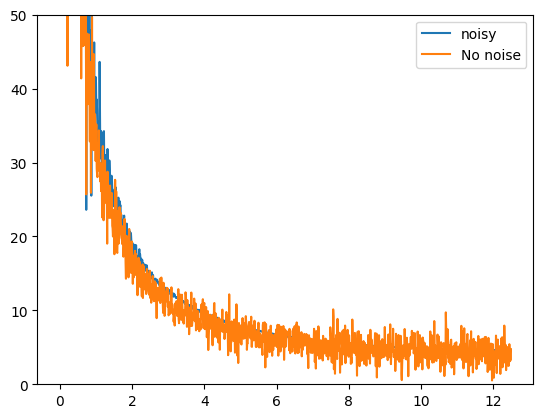

In [3]:
path = './data/track_mpc_noisy.csv'
df = pd.read_csv(path, skiprows=8)
print(len(df))
yf = fft(df.pose_x.values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='noisy')

path = './data/track_mpc.csv'
df = pd.read_csv(path, skiprows=8)
print(len(df))
yf = fft(df.pose_x.values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='No noise')
plt.legend()
plt.ylim((0, 50))
plt.show()

1500
1500


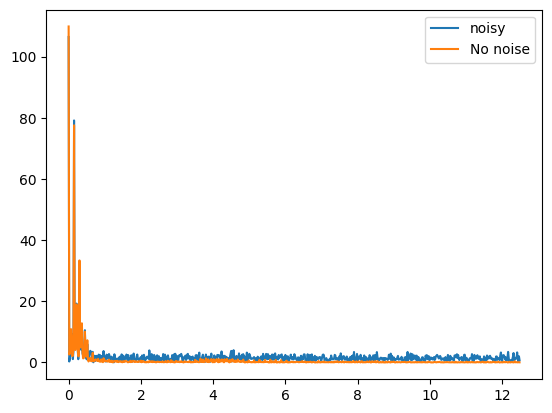

In [4]:
path = './data/track_pp_noisy.csv'
df = pd.read_csv(path, skiprows=8).iloc[1000:]
print(len(df))
yf = fft(df.steering_angle.values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='noisy')

path = './data/track_pp.csv'
df = pd.read_csv(path, skiprows=8).iloc[1000:]
print(len(df))
yf = fft(df.steering_angle.values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='No noise')
plt.legend()
plt.show()

319999


(0.0, 25.0)

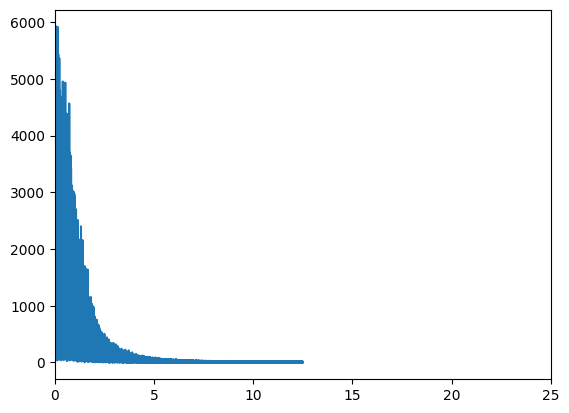

In [5]:
dfs = []
for i in range(32):
    path = f'../SI_Toolkit_ASF/Experiments/0_DNN/Recordings/Train/Trajectory-{i}.csv'
    dfs.append(pd.read_csv(path, skiprows=8))
df = pd.concat(dfs, axis=0)
print(len(df))
yf = fft(df.slip_angle.values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='noisy')
plt.xlim((0, 25))

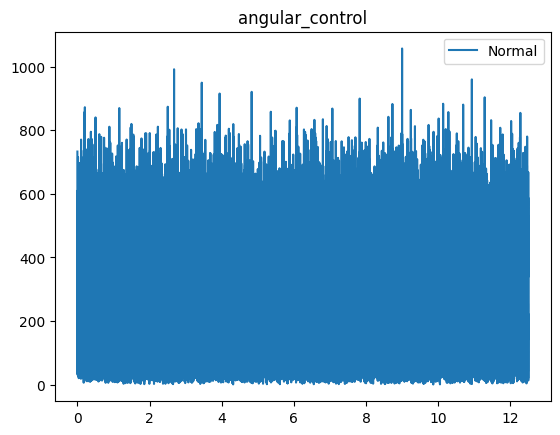

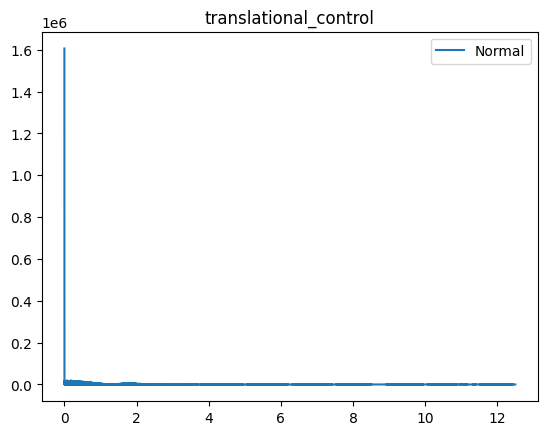

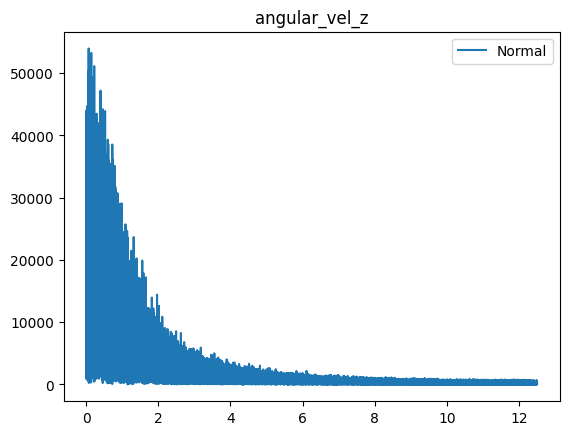

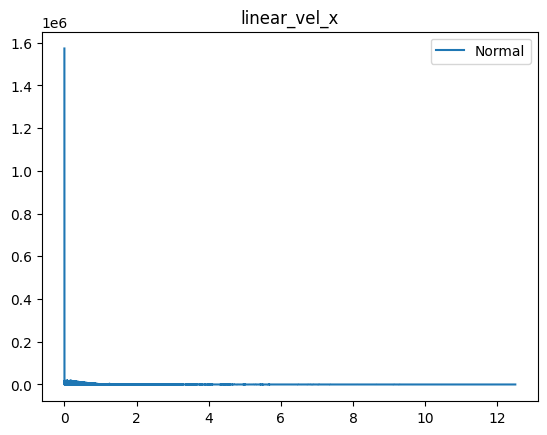

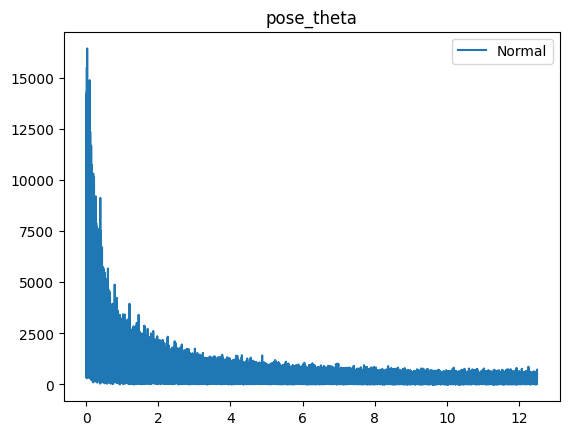

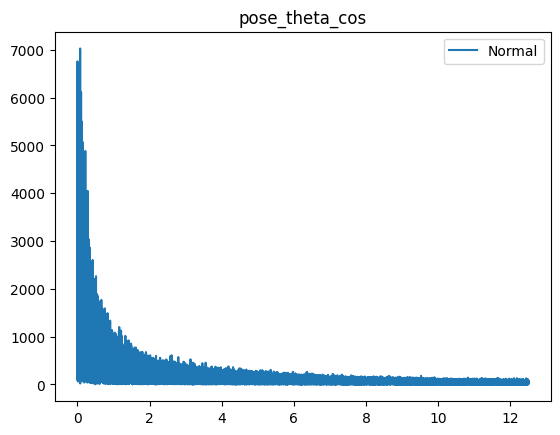

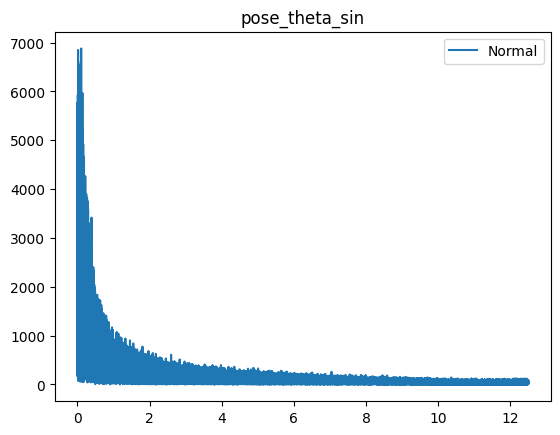

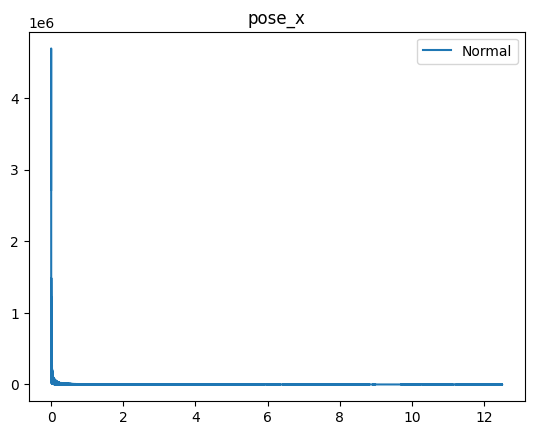

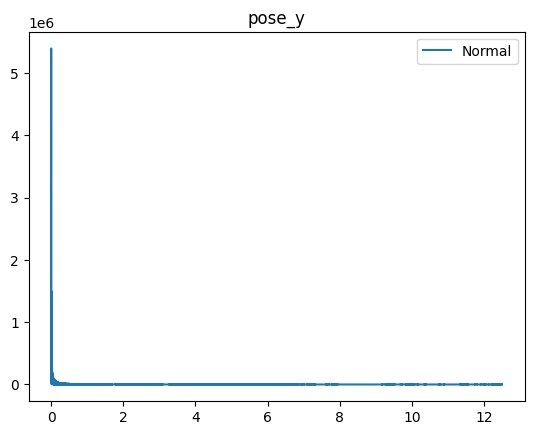

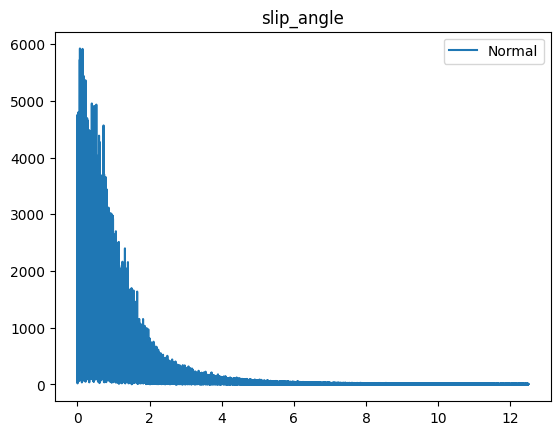

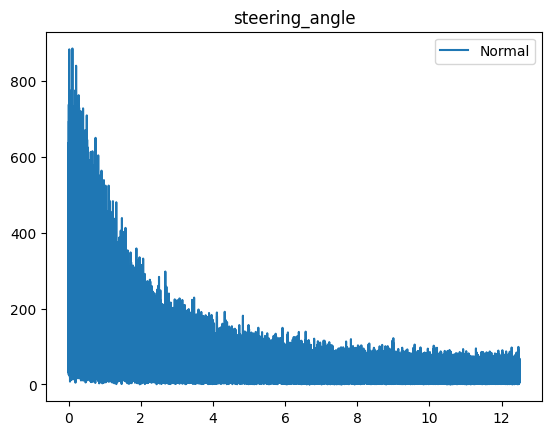

In [6]:
columns = ['angular_control', 'translational_control', 'angular_vel_z', 'linear_vel_x', 'pose_theta', 'pose_theta_cos', 'pose_theta_sin', 'pose_x', 'pose_y', 'slip_angle', 'steering_angle' ]
for column in columns:
    yf = fft(df[column].values)
    x = scipy.fftpack.fftfreq(yf.size, 0.04)
    plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='Normal')
    plt.legend()
    plt.title(column)
    plt.show()

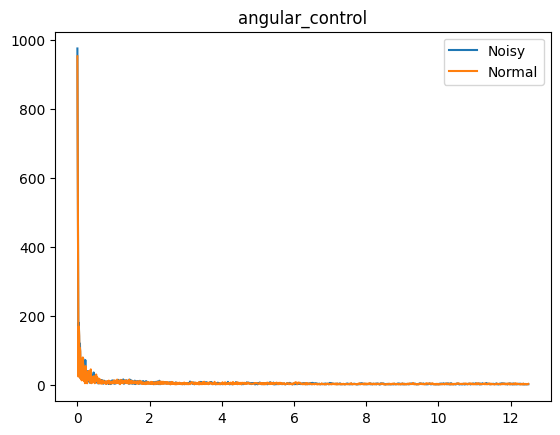

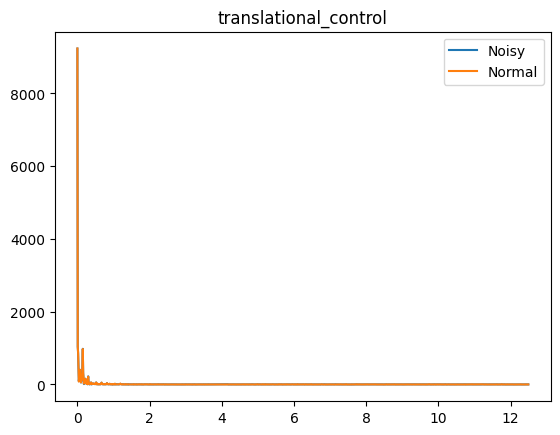

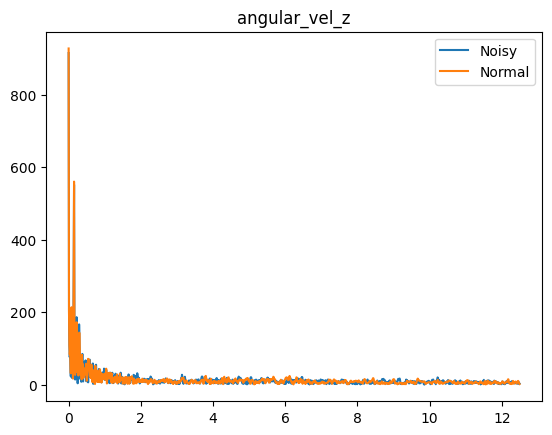

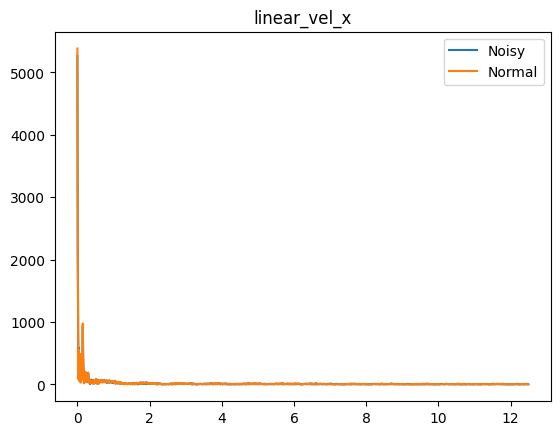

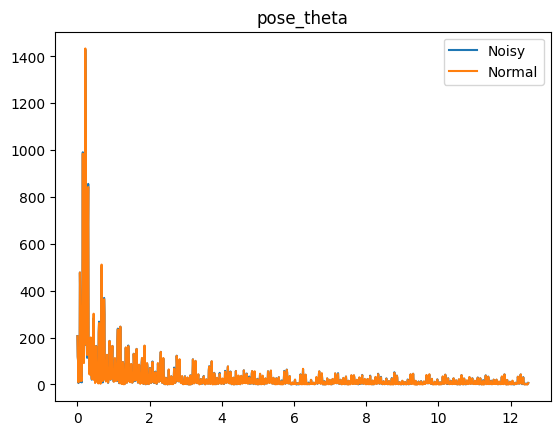

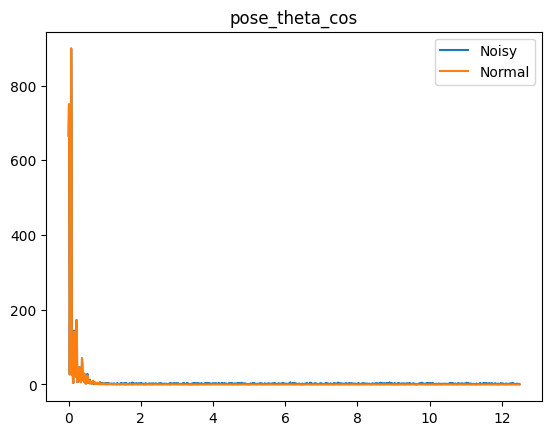

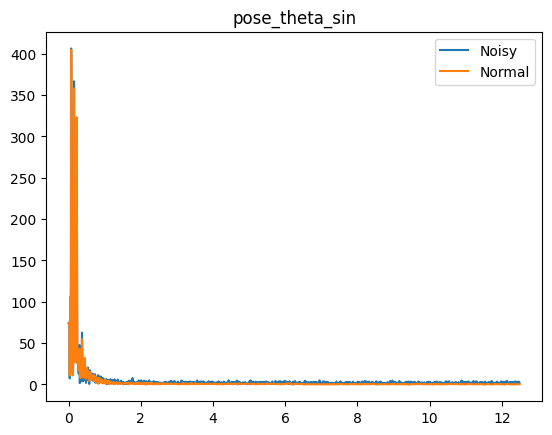

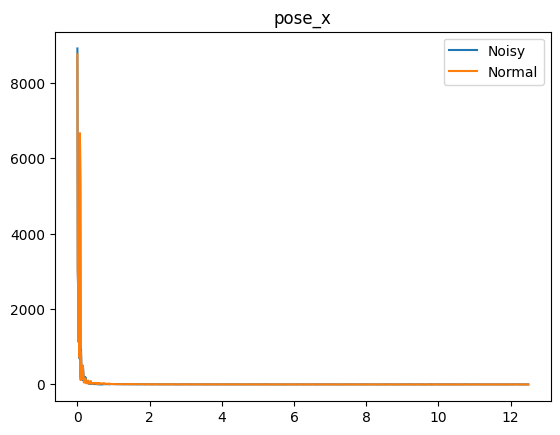

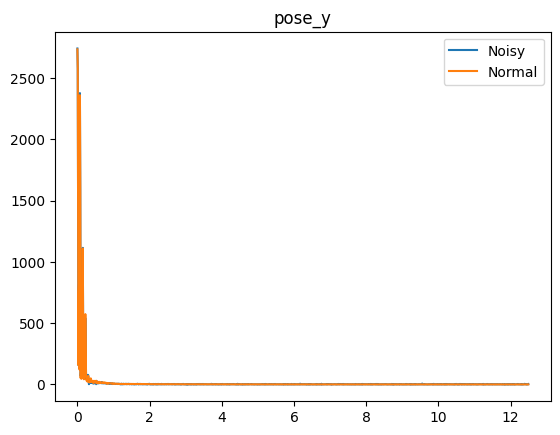

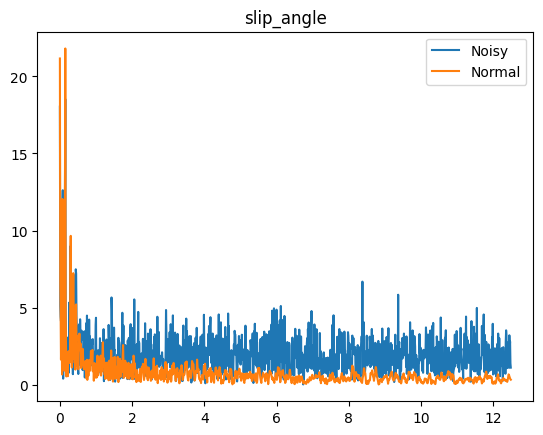

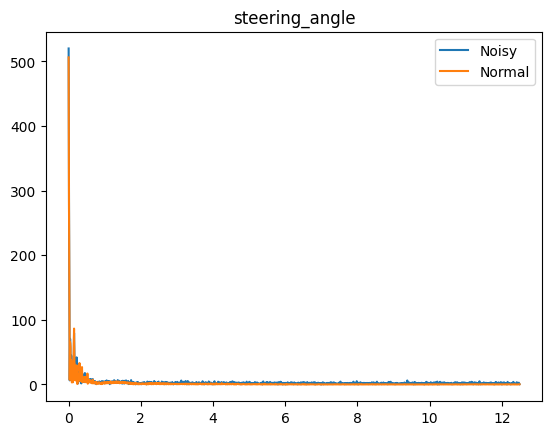

In [7]:
path = './data/track_pp.csv'
df = pd.read_csv(path, skiprows=8)
path = './data/track_pp_noisy.csv'
df_noisy = pd.read_csv(path, skiprows=8)
columns = ['angular_control', 'translational_control', 'angular_vel_z', 'linear_vel_x', 'pose_theta', 'pose_theta_cos', 'pose_theta_sin', 'pose_x', 'pose_y', 'slip_angle', 'steering_angle' ]
for column in columns:
    yf = fft(df_noisy[column].values)
    x = scipy.fftpack.fftfreq(yf.size, 0.04)
    plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='Noisy')
    yf = fft(df[column].values)
    x = scipy.fftpack.fftfreq(yf.size, 0.04)
    plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='Normal')
    plt.ylim((0, 50))
    plt.legend()
    plt.title(column)
    plt.show()

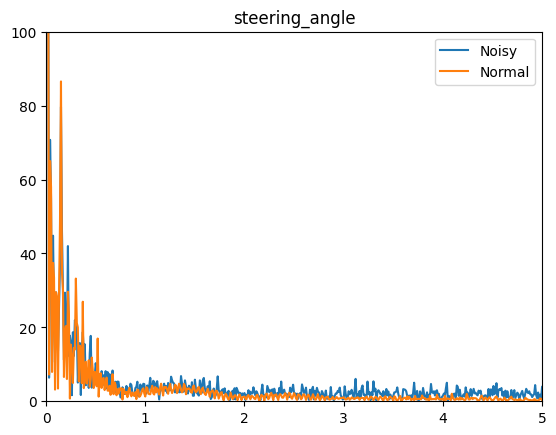

In [8]:
colum = 'steering_angle'
yf = fft(df_noisy[column].values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='Noisy')
yf = fft(df[column].values)
x = scipy.fftpack.fftfreq(yf.size, 0.04)
plt.plot(x[:x.size//2], abs(yf)[:yf.size//2], label='Normal')
plt.legend()
plt.title(column)
plt.xlim((0, 5))
plt.ylim((0, 100))
plt.show()

## Tryout filter

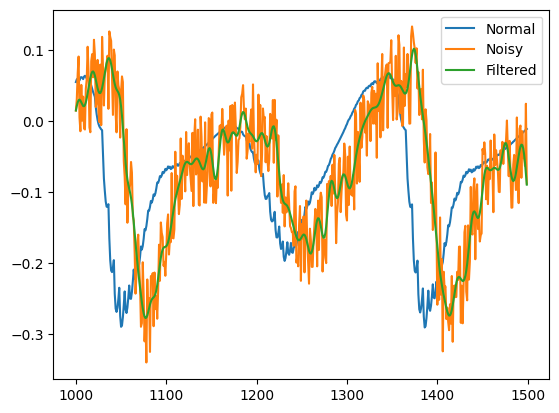

In [15]:
 def butterworth_filter(df):
    cutoff_frequencies = {
        # 'angular_control': 12.4999,  # 4
        # 'translational_control': 12.4999,  # 4
        # 'angular_vel_z': 12.4999,  # 7
        # 'linear_vel_x': 12.4999,  # 4
        # 'pose_theta': 12.4999,  # 4
        # 'pose_theta_cos': 12.4999,  # 3
        # 'pose_theta_sin': 12.4999,  # 3
        # 'pose_x': 12.4999,  # 1
        # 'pose_y': 12.4999,  # 1
        # 'slip_angle': 12.4999,  # 4
        'steering_angle': 2  # 4
    }  # TODO: Currently does not work for delta outputs

    for column, cutoff in cutoff_frequencies.items():
        butter = signal.butter(5, cutoff, analog=False, output='sos', fs=25)  # TODO: Do not hardcode fs
        df[column] = signal.sosfiltfilt(butter, df[column])
    return df

path = './data/track_pp.csv'
df = pd.read_csv(path, skiprows=8).iloc[1000:1500]
path = './data/track_pp_noisy.csv'
df_noisy = pd.read_csv(path, skiprows=8).iloc[1000:1500]

df_filtered = butterworth_filter(df_noisy.copy())

fig, ax = plt.subplots(1, 1)
# df.plot(x='pose_x', y='pose_y', label='Normal', ax=ax)
# df_noisy.plot(x='pose_x', y='pose_y', label='Noisy', ax=ax)
# df_filtered.plot(x='pose_x', y='pose_y', label='Filtered', ax=ax)

df.steering_angle.plot(label='Normal', ax=ax)
df_noisy.steering_angle.plot(label='Noisy', ax=ax)
df_filtered.steering_angle.plot(label='Filtered', ax=ax)
plt.legend()

In [12]:
print(len(df_noisy), len(df_filtered))

500 500


In [10]:
df_list = [df_noisy[i:i+2] for i in range(0,df.shape[0],2)]
for i, df in enumerate(df_list):
    df_list[i] = butterworth_filter(df)
df_filtered = pd.concat(df_list)
df_noisy.steering_angle.plot(label='Noisy')
df_filtered.steering_angle.plot(label='Filtered')
plt.legend()
plt.show()

ValueError: The length of the input vector x must be greater than padlen, which is 18.

# Check delta values of pose theta

<AxesSubplot:>

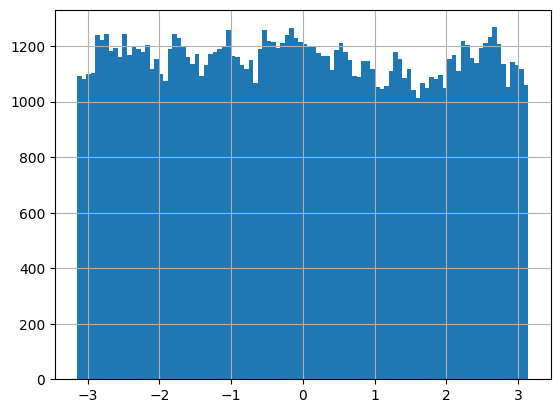

In [42]:
base_path = '../SI_Toolkit_ASF/Experiments/0_DNN_tiv/Recordings_preprocessed/Train'
dfs = []
for i in range(32):
    df = pd.read_csv(f'{base_path}/Trajectory-{i}.csv', skiprows=8)
    dfs.append(df)
df = pd.concat(dfs)
(df.pose_theta).hist(bins=100)

In [39]:
df[df.D_pose_theta * 0.04 > 2.0]

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_theta_cos,pose_theta_sin,pose_x,pose_y,...,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_pose_theta_sin,D_pose_theta_cos,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle
